In [1]:
import pandas as pd

In [2]:
#Se importa numpy
import numpy as np

In [3]:


ecommerce = "C:\\Users\\USUARIO\\Desktop\\No_Country\\2019-Nov.csv"

In [4]:
ecommerces = pd.read_csv(ecommerce)

In [13]:
# registros y columnas 
np.shape(ecommerces)

(67501979, 9)

In [7]:
#Columnas y el tipo de dato 
ecommerces.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67501979 entries, 0 to 67501978
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 4.5+ GB


In [ ]:
#Valores faltantes por columna 
ecommerces.isnull().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code    21898171
brand             9224078
price                   0
user_id                 0
user_session           10
dtype: int64

In [17]:
import matplotlib.pyplot as plt

In [8]:
print(ecommerces.head())
print(ecommerces.info())

                event_time event_type  product_id          category_id  \
0  2019-11-01 00:00:00 UTC       view     1003461  2053013555631882655   
1  2019-11-01 00:00:00 UTC       view     5000088  2053013566100866035   
2  2019-11-01 00:00:01 UTC       view    17302664  2053013553853497655   
3  2019-11-01 00:00:01 UTC       view     3601530  2053013563810775923   
4  2019-11-01 00:00:01 UTC       view     1004775  2053013555631882655   

               category_code   brand   price    user_id  \
0     electronics.smartphone  xiaomi  489.07  520088904   
1  appliances.sewing_machine  janome  293.65  530496790   
2                        NaN   creed   28.31  561587266   
3  appliances.kitchen.washer      lg  712.87  518085591   
4     electronics.smartphone  xiaomi  183.27  558856683   

                           user_session  
0  4d3b30da-a5e4-49df-b1a8-ba5943f1dd33  
1  8e5f4f83-366c-4f70-860e-ca7417414283  
2  755422e7-9040-477b-9bd2-6a6e8fd97387  
3  3bfb58cd-7892-48cc-8020-2f17e

In [9]:
ecommerces.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


In [ ]:
# convertir la columna 'event_time' a Datetime 
ecommerces['event_time'] = pd.to_datetime(ecommerces['event_time'])

In [23]:
import pandas as pd

# Asegúrate de que 'event_time' esté en formato datetime
ecommerces['event_time'] = pd.to_datetime(ecommerces['event_time'], errors='coerce')

# Ahora ya puedes extraer la hora del día
ecommerces['hour_day'] = ecommerces['event_time'].dt.hour


In [22]:
# Crear una columna para la hora del evento
ecommerces['hour_day'] = ecommerces['event_time'].dt.hour


AttributeError: Can only use .dt accessor with datetimelike values

In [14]:
usuarios_unicos = ecommerces['user_id'].nunique()
usuarios_que_compran = ecommerces[ecommerces['event_type'] == 'purchase']['user_id'].nunique()
tasa_conversion = usuarios_que_compran / usuarios_unicos
print("Tasa de Conversión:", tasa_conversion)

Tasa de Conversión: 0.11948701840336765


La tasa se conversión actual es de 12% se podría aumentar en un 3% 

In [ ]:
# ojo no corre----- promedio de duración en la sesión 
ecommerces.sort_values(by=['user_session', 'event_time'], inplace=True)
sesion_duracion = ecommerces.groupby('user_session').apply(lambda x: x['event_time'].max() - x['event_time'].min())
duracion_promedio = sesion_duracion.mean()
print("Duración Promedio de la Sesión:", duracion_promedio)

In [ ]:
# Tasa de abandono de carrito 
usuarios_carrito = ecommerces[ecommerces['event_type'] == 'cart']['user_id'].nunique()
tasa_abandono_carrito = (usuarios_carrito - usuarios_que_compran) / usuarios_carrito
print("Tasa de Abandono de Carrito:", tasa_abandono_carrito)


Tasa de Abandono de Carrito: 0.4655382943473678


la tasa de abandono del carrito es de 0.46% se podría plantear reducir en un 4% 

In [ ]:
# Productos más vendidos
productos_populares = ecommerces[ecommerces['event_type'] == 'purchase'].groupby('brand').size().sort_values(ascending=False)
print("Top Marcas :\n", productos_populares.head(10))




top Marcas :
 brand
samsung     200027
apple       166064
xiaomi       68292
huawei       23703
cordiant     16983
oppo         15080
lucente      14559
lg           12879
sony         10309
artel         9267
dtype: int64


In [16]:
# Categorías populares
categorias_populares = ecommerces[ecommerces['event_type'] == 'purchase'].groupby('category_code').size().sort_values(ascending=False)
print("Categorías Populares:\n", categorias_populares.head(10))

Categorías Populares:
 category_code
electronics.smartphone              382647
electronics.audio.headphone          40834
electronics.video.tv                 30274
electronics.clocks                   23237
appliances.kitchen.washer            19772
computers.notebook                   18433
appliances.environment.vacuum        18193
appliances.kitchen.refrigerators     13042
apparel.shoes                        10140
electronics.tablet                    6138
dtype: int64


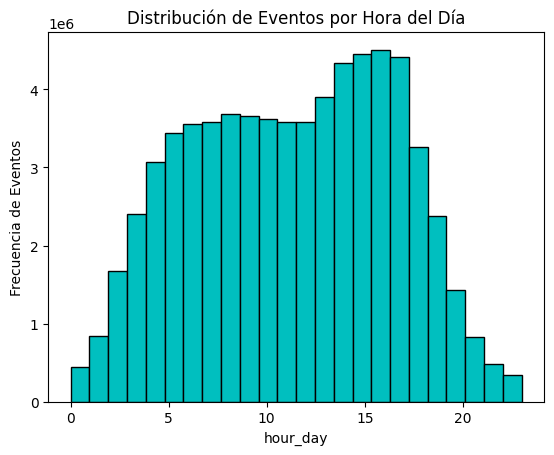

In [28]:
import matplotlib.pyplot as plt

plt.hist(ecommerces['hour_day'], bins=24, color='c', edgecolor='black')
plt.xlabel('hour_day')
plt.ylabel('Frecuencia de Eventos')
plt.title('Distribución de Eventos por Hora del Día')
plt.show()


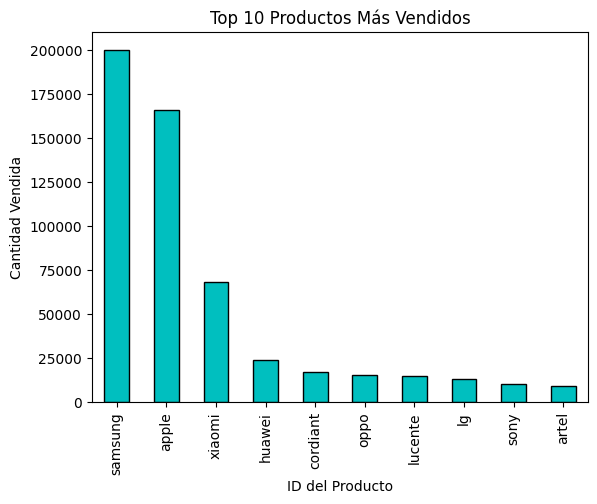

In [27]:
top_productos = productos_populares.head(10)
top_productos.plot(kind='bar', color='c', edgecolor='black')
plt.xlabel('ID del Producto')
plt.ylabel('Cantidad Vendida')
plt.title('Top 10 Productos Más Vendidos')
plt.show()
